In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from umap import UMAP, plot

# random varaible values and parameter values
df = pd.read_csv('azdiabetes.csv')
X = df[['npreg', 'bp', 'bmi', 'ped', 'age']]
X = (X - X.mean()) / X.std()  # centering and scaling
X['intercept'] = 1
X = X.values
X = np.concatenate((X[:, -1:], X[:, :-1]), axis=1)
y = df['diabetes'].replace({'Yes': 1, 'No': 0})

# multiple chains of initial values of beta and z
mean_beta = np.zeros(6)
cov_beta = np.diag([16, 4, 4, 4, 4, 4])
beta =  np.random.multivariate_normal(mean_beta, cov_beta, 6)
z = np.random.choice([0, 1], size=(6, X.shape[1]))
z[:,0] = 1

/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-p

In [2]:
from sampler import MetropolisHastingsSampler

cov_beta = np.array([16, 4, 4, 4, 4, 4])

beta_MH, z_MH = MetropolisHastingsSampler(y, X, z[0], beta[0], mean_beta, cov_beta).run_sampler()
beta_MH = np.expand_dims(beta_MH, axis=0)
z_MH = np.expand_dims(z_MH, axis=0)


for r in range(1,6):
    target_beta, target_z = MetropolisHastingsSampler(y, X, z[r], beta[r], mean_beta, cov_beta).run_sampler()
    target_beta = np.expand_dims(target_beta, axis=0)
    target_z = np.expand_dims(target_z, axis=0)
    beta_MH = np.concatenate((beta_MH, target_beta), axis=0)
    z_MH = np.concatenate((z_MH, target_z), axis=0)

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 9.54


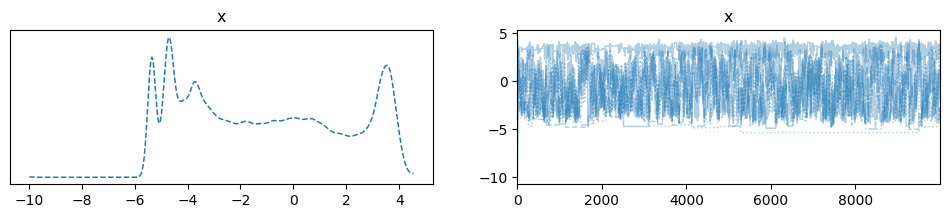

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 12.23


/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


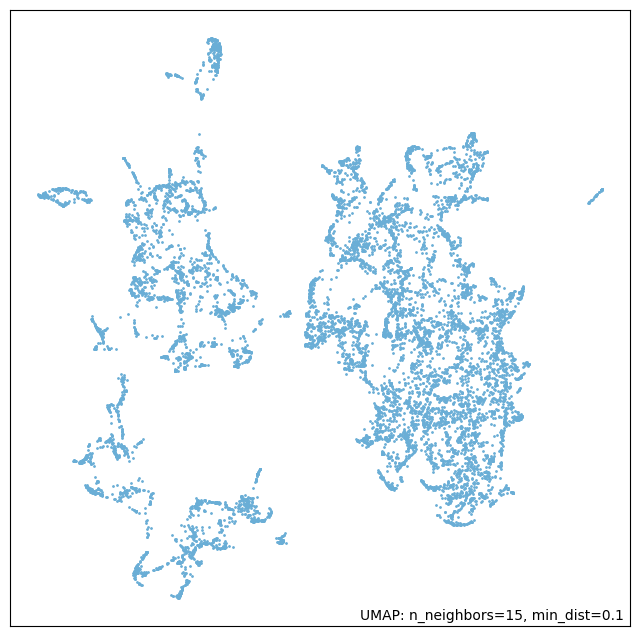

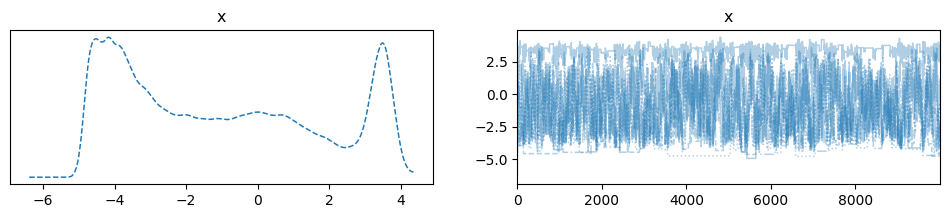

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 11.15


/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


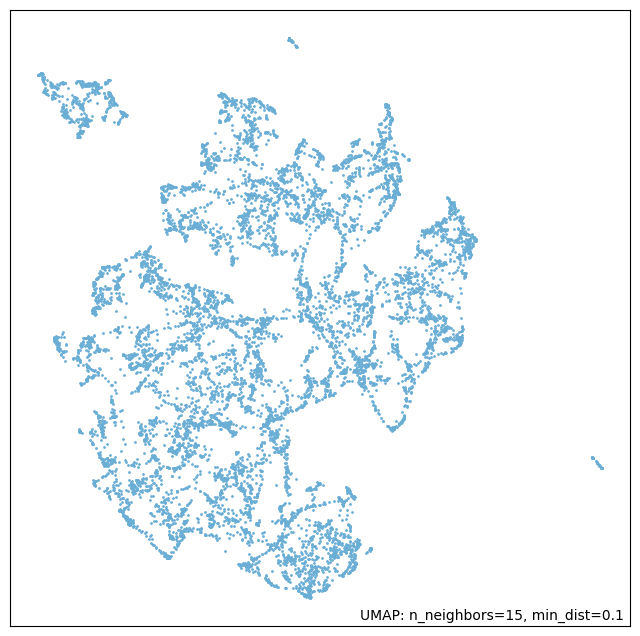

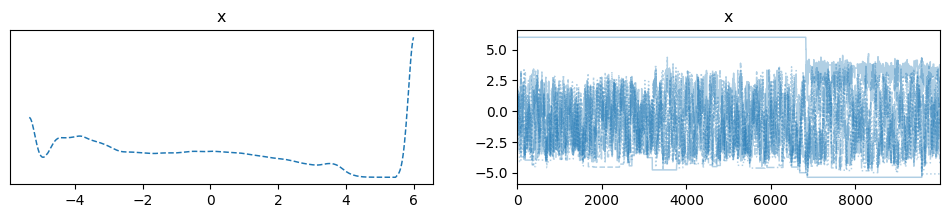

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 10.22


/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


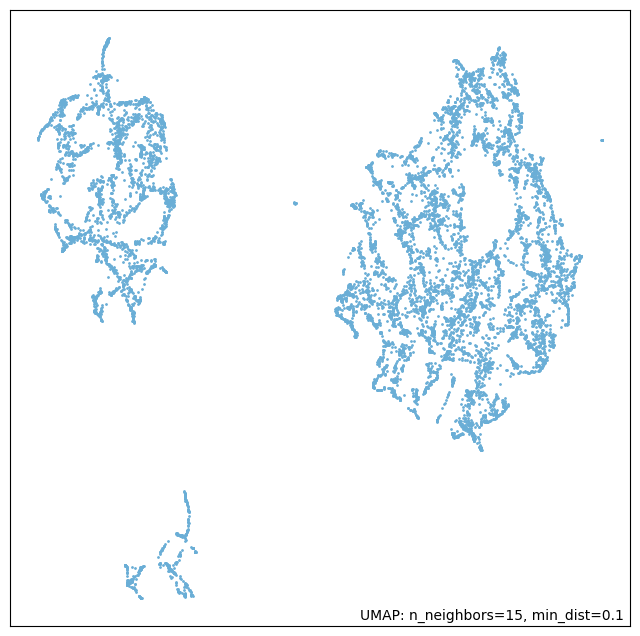

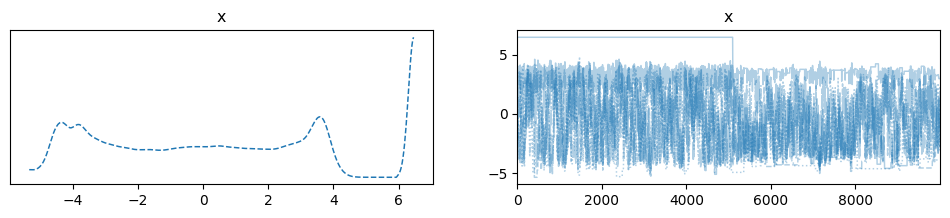

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 10.71


/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


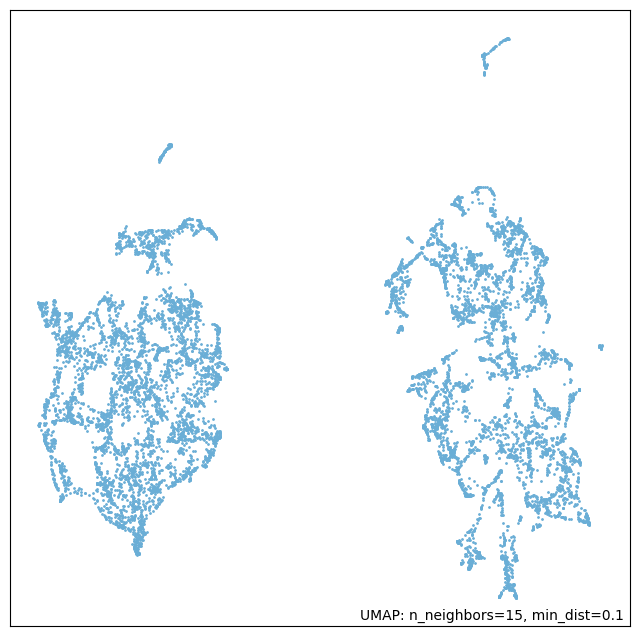

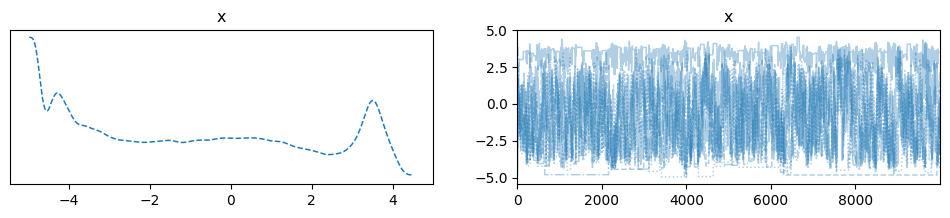

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 10.91


/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


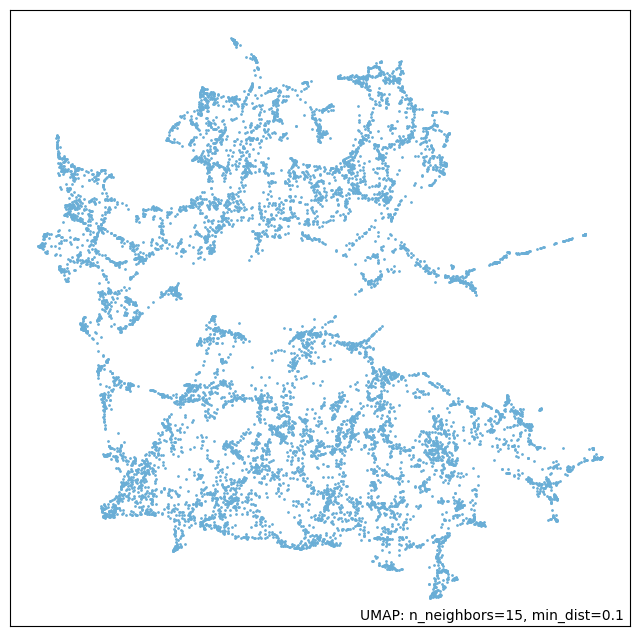

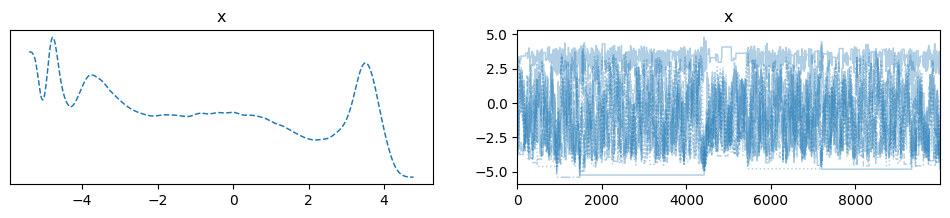

/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


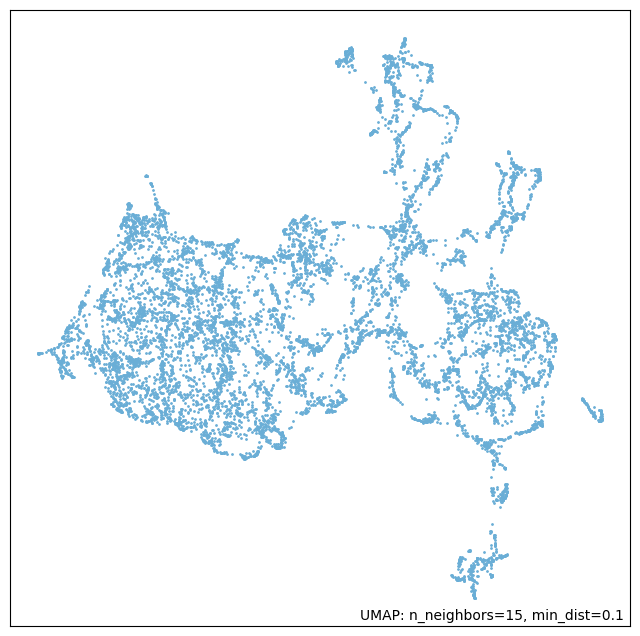

In [3]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

for r in range(6):
    betadata_MH = az.convert_to_dataset(beta_MH[r].T)

    az.plot_trace(betadata_MH, combined=True, compact=True)
    print(az.ess(betadata_MH))  # ess should be as large as possible

    %matplotlib inline
    plt.show()

    df = pd.DataFrame(beta_MH[r], columns=['beta0','beta1','beta2','beta3','beta4','beta5'])
    map = UMAP().fit(df)

    %matplotlib inline
    plot.points(map)


In [4]:
from sampler import PolyaGamma

cov_beta = np.diag([16, 4, 4, 4, 4, 4])

beta_PG, z_PG = PolyaGamma(y, X, z[0], beta[0], mean_beta, cov_beta).run_sampler()
beta_PG = np.expand_dims(beta_PG, axis=0)
z_PG = np.expand_dims(z_PG, axis=0)

for r in range(1,6):
    target_beta, target_z = PolyaGamma(y, X, z[r], beta[r], mean_beta, cov_beta).run_sampler()
    target_beta = np.expand_dims(target_beta, axis=0)
    target_z = np.expand_dims(target_z, axis=0)
    beta_PG = np.concatenate((beta_PG, target_beta), axis=0)
    z_PG = np.concatenate((z_PG, target_z), axis=0)

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 7.178


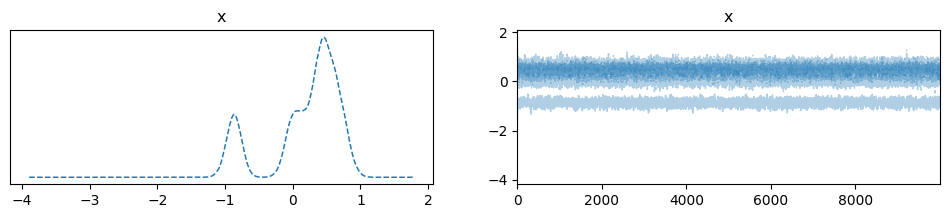

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 7.178


/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


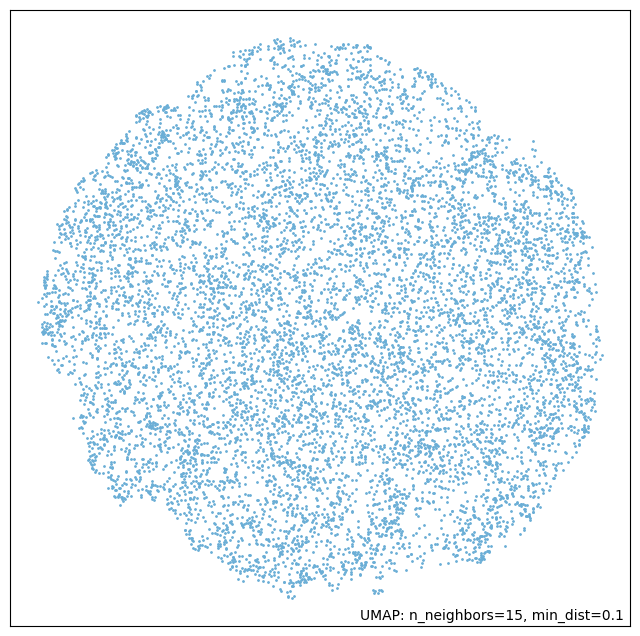

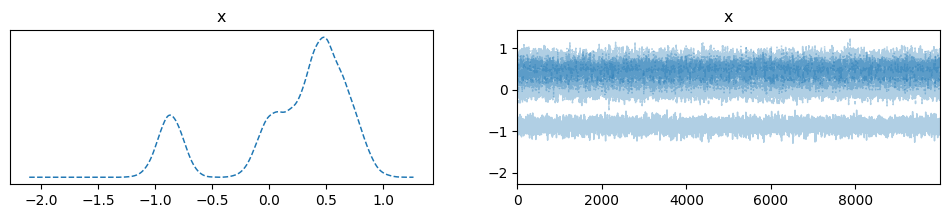

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 7.158


/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


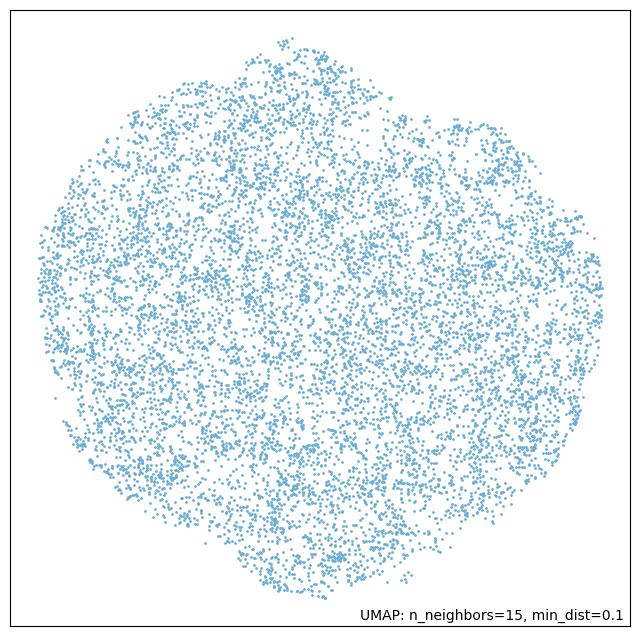

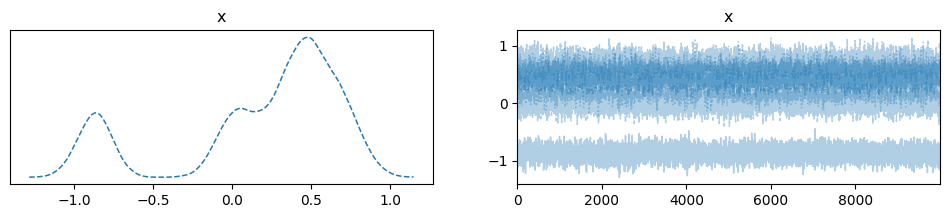

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 7.167


/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


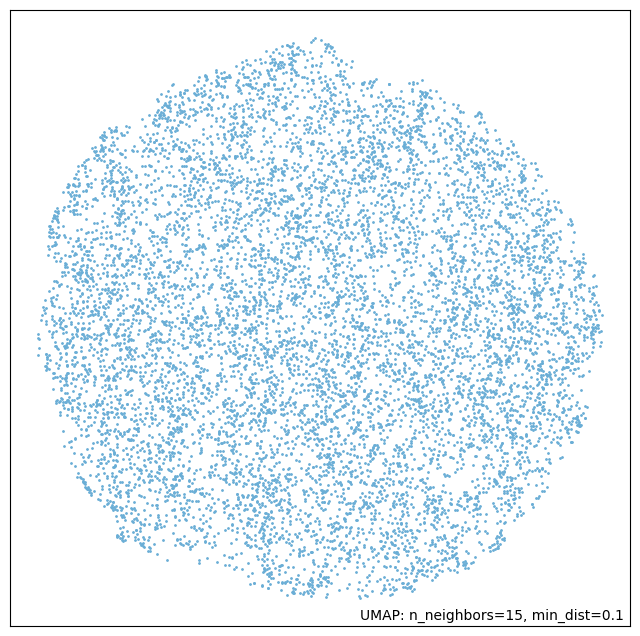

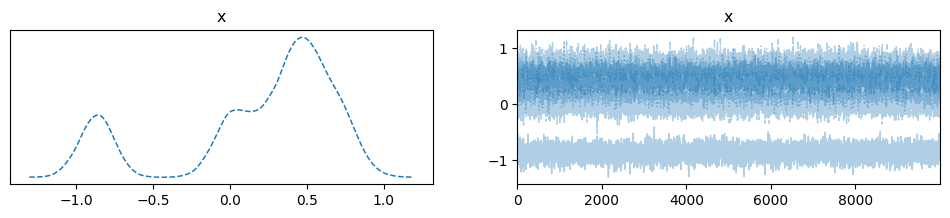

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 7.165


/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


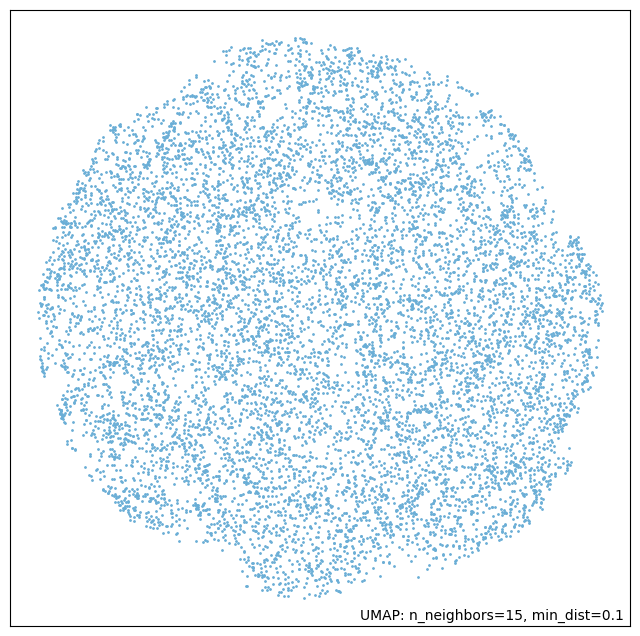

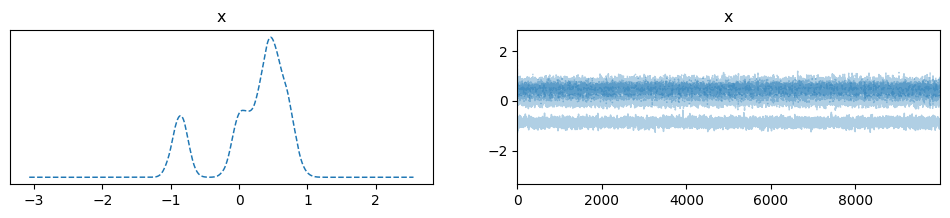

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    x        float64 8B 7.174


/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


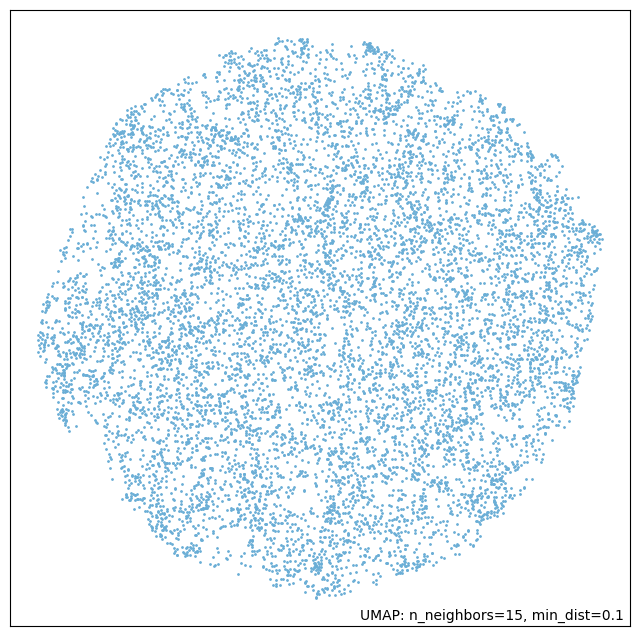

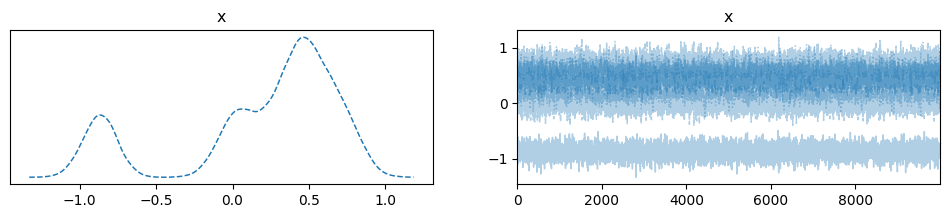

/Users/cherylshi/UROP/PoP_venv/lib/python3.11/site-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


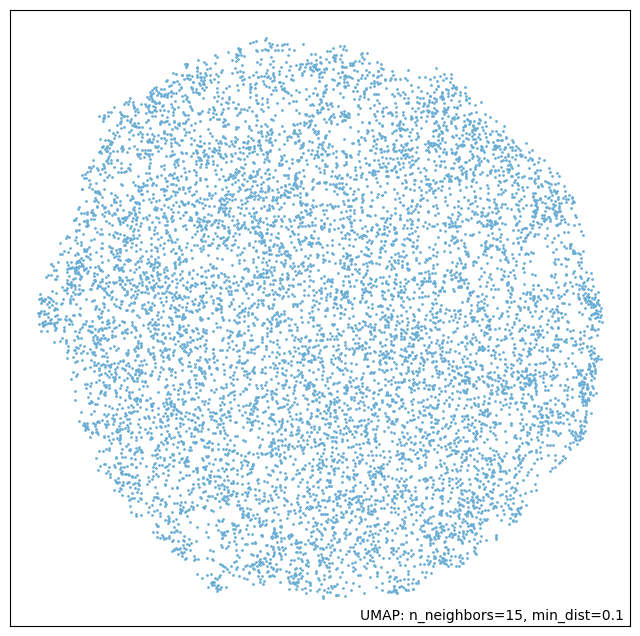

In [5]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

for r in range(6):
    betadata_PG = az.convert_to_dataset(beta_PG[r].T)

    az.plot_trace(betadata_PG, combined=True, compact=True)
    print(az.ess(betadata_PG))  # ess should be as large as possible

    %matplotlib inline
    plt.show()

    df = pd.DataFrame(beta_PG[r], columns=['beta0','beta1','beta2','beta3','beta4','beta5'])
    map = UMAP().fit(df)

    %matplotlib inline
    plot.points(map)

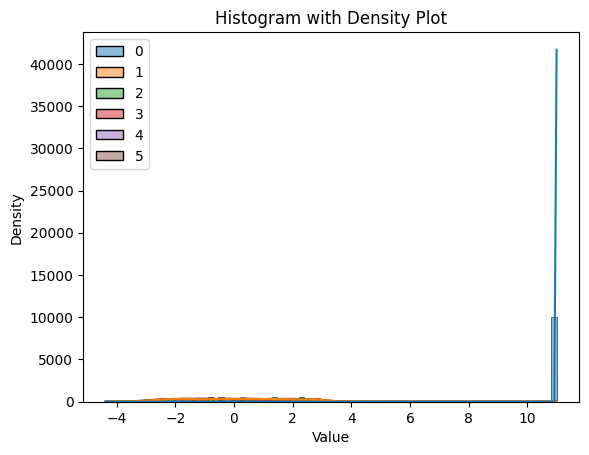

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histogram and density
sns.histplot(beta_MH[0], kde=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram with Density Plot')
plt.show()

In [9]:
beta_MH[0]

array([[-0.05404772,  0.81308318,  0.37010712, -2.42651586, -4.08986633,
        -3.8283989 ],
       [10.99367625,  0.81308318,  0.37010712, -2.42651586, -4.08986633,
        -3.8283989 ],
       [10.99367625,  0.81308318,  0.37010712, -2.42651586, -4.08986633,
        -3.8283989 ],
       ...,
       [10.99367625,  1.86427185, -0.87018314, -1.58566451,  1.17913443,
         0.33528398],
       [10.99367625,  1.86427185, -0.87018314, -1.58566451,  1.17913443,
         0.33528398],
       [10.99367625,  1.86427185, -0.87018314, -1.58566451,  1.17913443,
         0.33528398]])

In [10]:
z_MH

array([[[1., 1., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        ...,
        [1., 1., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1.],
        [1., 1., 1., 0., 1., 0.]]])